## Rusia-USA exchange rate,crude oil and gold price analysis, prediction and forecasting using Time Series.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
assets = ['RUB=X', 'CL=F', 'GC=F']
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,10,20)
assets_price = yf.download(assets,start=start,end = end,interval='1d')

[*********************100%***********************]  3 of 3 completed


## Analysis

In [3]:
assets_price

Adj Close                              Close               \
                 CL=F         GC=F      RUB=X       CL=F         GC=F   
Date                                                                    
2021-01-01        NaN          NaN  73.911201        NaN          NaN   
2021-01-04  47.619999  1944.699951  74.127403  47.619999  1944.699951   
2021-01-05  49.930000  1952.699951  74.475403  49.930000  1952.699951   
2021-01-06  50.630001  1906.900024  74.135101  50.630001  1906.900024   
2021-01-07  50.830002  1912.300049  74.091499  50.830002  1912.300049   
...               ...          ...        ...        ...          ...   
2022-10-14  85.610001  1641.699951  63.964901  85.610001  1641.699951   
2022-10-17  85.459999  1657.000000  62.615002  85.459999  1657.000000   
2022-10-18  82.820000  1649.000000  62.014999  82.820000  1649.000000   
2022-10-19  85.550003  1627.500000  62.264999  85.550003  1627.500000   
2022-10-20        NaN          NaN  60.965000        NaN          NaN   

                            High                                Low  \
                RUB=X       CL=F         GC=F      RUB=X       CL=F   
Date                                                                  
2021-01-01  73.911201        NaN          NaN  73.911201        NaN   
2021-01-04  74.127403  49.830002  1945.099976  74.485703  47.180000   
2021-01-05  74.475403  50.200001  1952.699951  75.172997  47.240002   
2021-01-06  74.135101  50.939999  1959.900024  74.216301  49.480000   
2021-01-07  74.091499  51.279999  1926.699951  74.921799  50.389999   
...               ...        ...          ...        ...        ...   
2022-10-14  63.964901  89.730003  1667.000000  64.665001  85.199997   
2022-10-17  62.615002  87.120003  1657.000000  62.615002  84.610001   
2022-10-18  62.014999  86.510002  1655.199951  62.514999  82.089996   
2022-10-19  62.264999  86.199997  1637.500000  62.465000  82.589996   
2022-10-20  60.965000        NaN          NaN  61.930000        NaN   

                                         Open                          \
                   GC=F      RUB=X       CL=F         GC=F      RUB=X   
Date                                                                    
2021-01-01          NaN  73.910004        NaN          NaN  73.911201   
2021-01-04  1912.199951  73.042503  48.400002  1912.199951  74.342598   
2021-01-05  1941.300049  73.959099  47.380001  1941.699951  74.464996   
2021-01-06  1901.500000  73.411003  49.820000  1952.000000  74.213997   
2021-01-07  1912.000000  73.540901  50.529999  1922.599976  74.099998   
...                 ...        ...        ...          ...        ...   
2022-10-14  1640.000000  62.240002  89.269997  1665.300049  64.665001   
2022-10-17  1646.800049  61.439999  85.589996  1650.199951  62.615002   
2022-10-18  1649.000000  61.539902  85.699997  1651.400024  62.014999   
2022-10-19  1627.500000  61.366501  83.690002  1637.500000  61.465000   
2022-10-20          NaN  60.964901        NaN          NaN  60.965000   

              Volume               
                CL=F   GC=F RUB=X  
Date                               
2021-01-01       NaN    NaN     0  
2021-01-04  528525.0  154.0     0  
2021-01-05  643191.0  113.0     0  
2021-01-06  509365.0  331.0     0  
2021-01-07  369292.0  122.0     0  
...              ...    ...   ...  
2022-10-14  237026.0   82.0     0  
2022-10-17  172020.0  238.0     0  
2022-10-18   97304.0  597.0     0  
2022-10-19   71309.0   84.0     0  
2022-10-20       NaN    NaN     0  

[470 rows x 18 columns]

In [4]:
assets_price_close = assets_price['Close']

In [5]:
assets_price_close 

,CL=F,GC=F,RUB=X
Date,,,
2021-01-01,NaN,NaN,73.911201
2021-01-04,47.619999,1944.699951,74.127403
2021-01-05,49.930000,1952.699951,74.475403
2021-01-06,50.630001,1906.900024,74.135101
2021-01-07,50.830002,1912.300049,74.091499
...,...,...,...
2022-10-14,85.610001,1641.699951,63.964901
2022-10-17,85.459999,1657.000000,62.615002
2022-10-18,82.820000,1649.000000,62.014999


In [6]:
assets_price_close =assets_price_close.rename(columns={'CL=F': 'oil', 'GC=F': 'gold','RUB=X':'russia_usa_exchange_rate'})

In [7]:
assets_price_close

,oil,gold,russia_usa_exchange_rate
Date,,,
2021-01-01,NaN,NaN,73.911201
2021-01-04,47.619999,1944.699951,74.127403
2021-01-05,49.930000,1952.699951,74.475403
2021-01-06,50.630001,1906.900024,74.135101
2021-01-07,50.830002,1912.300049,74.091499
...,...,...,...
2022-10-14,85.610001,1641.699951,63.964901
2022-10-17,85.459999,1657.000000,62.615002
2022-10-18,82.820000,1649.000000,62.014999


In [8]:
assets_price_close .describe()

,oil,gold,russia_usa_exchange_rate
count,455.000000,454.000000,470.000000
mean,81.223934,1804.958588,72.914322
std,17.628038,72.826057,11.730933
min,47.619999,1623.300049,52.465099
25%,67.355000,1760.075012,69.087196
50%,78.500000,1799.500000,73.483097
75%,93.700001,1847.025024,74.904728
max,123.699997,2040.099976,138.965103


In [9]:
assets_price_close=assets_price_close.dropna()   # dropping the missing values

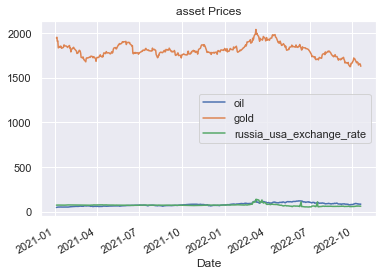

In [10]:
assets_price_close.loc[:,['oil','gold','russia_usa_exchange_rate']].plot()
plt.title('asset Prices')
plt.xlabel('Date')
plt.show()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

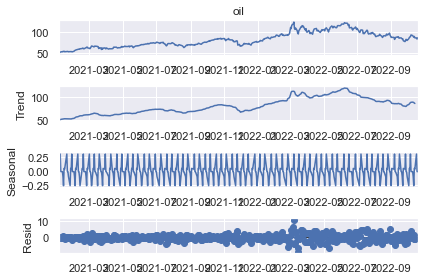

<Figure size 720x288 with 0 Axes>

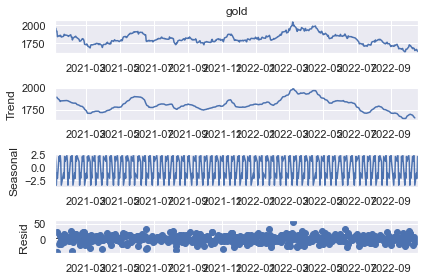

<Figure size 720x288 with 0 Axes>

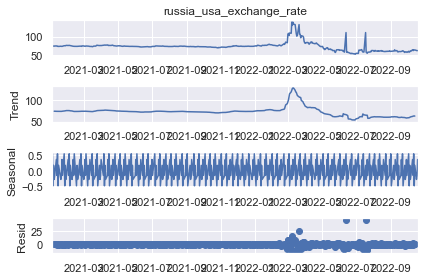

<Figure size 720x288 with 0 Axes>

In [12]:
for col in assets_price_close:
    decomposition = seasonal_decompose(assets_price_close[col], model='additive', period=7)
    decomposition.plot()
    plt.figure(figsize=(10, 4))
    plt.show()

In the first graph, we see the overall variations in the assets  . Overall, oil price is increased initially and started decreasing from may 2022.for gold there is no constant increase or decrease gold price has high variations.exchange rate has a constant trend till 2022 in march there is sudden increase and again started slowly decreasing in the exchange rate.


The second plot exhibits the trend of the data. Trend shows the overall movement of a time series. We can say that there exist a trend if there is a long-term increase or decrease in the data. So, we need to focus on the mean of the data at the beginning and end of the period to detect the trend. Trend needs to be removed before the modeling stage and this process is known as de-trending process.

Seasonality is the third plot which shows periodical ups and downs in the data. If there is a seasonality in the data, it should also be removed.

The last graph show the residuals. This is obtained after removing the trend and seasonal components from the time series. If we end up with a rather stable residual, it means that our data is stationary structure and ready to move on the modeling par

#### Statistical Test for detecting stationarity: ADF

In [13]:
from statsmodels.tsa.stattools import adfuller
for col in assets_price_close:
    stat_test = adfuller(assets_price_close[col])
    print('The test statistic for {} is {} and p-value is {}'.format( col,stat_test[0], stat_test[1]))

The test statistic for oil is -1.721931951791466 and p-value is 0.4198493690792369
The test statistic for gold is -2.289419991850741 and p-value is 0.17540294282696606
The test statistic for russia_usa_exchange_rate is -2.3135299311217823 and p-value is 0.16764142333181226


Let us focus on the p-value as it is easy to interpret. It suggests that the time series is non-stationary as p value for all the three assets is higher than 0.05.we need to convert the data into stationary.

so, lets take the difference of the assets and check whether it is stationary or not.

In [14]:
assets_price_close_diff = assets_price_close.diff().dropna()
assets_price_close_diff

,oil,gold,russia_usa_exchange_rate
Date,,,
2021-01-05,2.310001,8.000000,0.348000
2021-01-06,0.700001,-45.799927,-0.340302
2021-01-07,0.200001,5.400024,-0.043602
2021-01-08,1.410000,-78.200073,0.503601
2021-01-11,0.009998,15.500000,-0.193100
...,...,...,...
2022-10-13,1.840004,-0.300049,-0.435001
2022-10-14,-3.500000,-28.300049,0.274902
2022-10-17,-0.150002,15.300049,-1.349899


In [15]:
for col in assets_price_close_diff:
    stat_test = adfuller(assets_price_close_diff[col])
    print('The test statistic for {} is {} and p-value is {}'.format( col,stat_test[0], stat_test[1]))

The test statistic for oil is -11.027238544171142 and p-value is 5.786760630538272e-20
The test statistic for gold is -16.0204516949682 and p-value is 6.212847133834218e-29
The test statistic for russia_usa_exchange_rate is -14.453567060875402 and p-value is 7.033407206135442e-27


After taking the first difference,it is observed that p value of all the three assets is approximately eqaul to 0. it is quite obvious that the time series becomes stationary.

### Finding lag and determining stationarity
#### ACF
Autocorrelation implies serial dependence. Precisely, it occurs when a time series is highly correlated with its lagged version. It is shown by acf plot. The longer of the bar in the acf plot, the more dependence a series has.

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
import statsmodels.api as sm


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

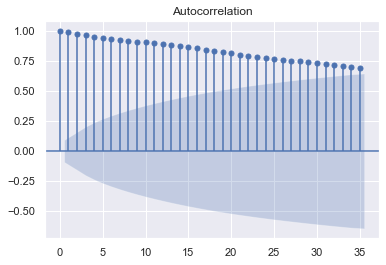

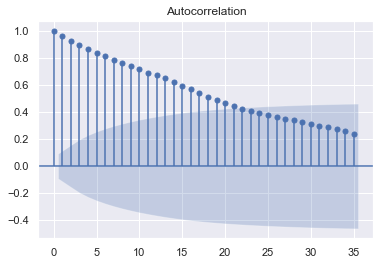

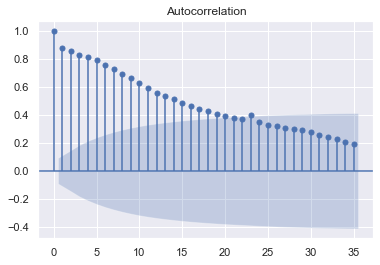

In [19]:
for col in assets_price_close:
    sm.graphics.tsa.plot_acf(assets_price_close[col], lags=35);

The acf plots of all the assets are slowly decaying, which is an indicator of non-stationarity. Besides, the blue shaded area represents the confidence interval. If the bar is in this confidence interval, it indicates that there is no significant correlation between this lag and the current one and this information is used for identifying the optimal lag. As this data is non-stationary, it makes no sense to apply this information here

lets consider the difference and plot the acf

acf of oil
acf of gold
acf of russia_usa_exchange_rate


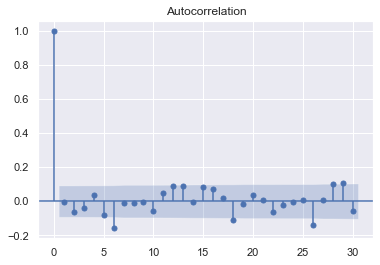

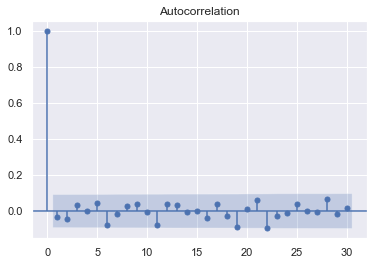

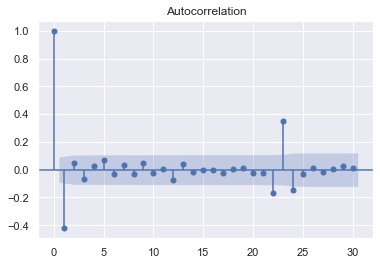

In [20]:
for col in assets_price_close_diff:
    sm.graphics.tsa.plot_acf(assets_price_close_diff[col], lags=30);
    print('acf of',col)

from the above acf plots let us consider the optimum lags as 12 for oil,11 for gold and 22 for russia usa exchange rate.

#### pacf

acf of oil
acf of gold
acf of russia_usa_exchange_rate


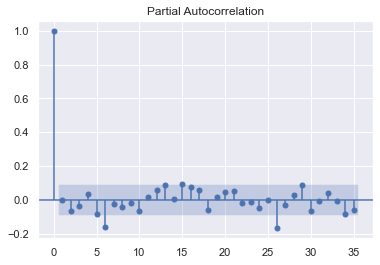

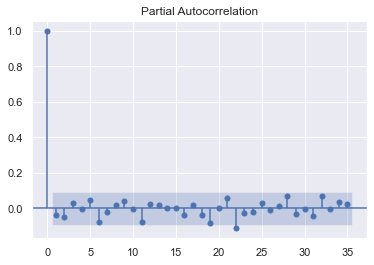

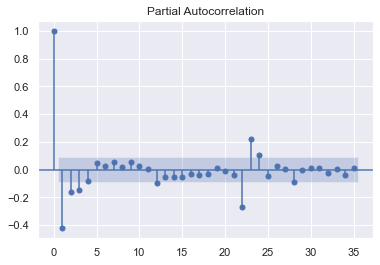

In [21]:
for col in assets_price_close_diff:
    sm.graphics.tsa.plot_pacf(assets_price_close_diff[col], lags=35);
    print('acf of',col)

from the above pacf plot let us consider the optimum lag as 12 for oil,19 for gold and 12 russia usa exchange rates.

## prediction

lets consider some models and determine which model is best based on the RMSE(root mean square error)value. Here we are using Moving Average,Auto Regression and integration of both moving average and auto regression for predicting the prices of the assets.

In [22]:
from statsmodels.tsa.arima.model import ARIMA

### Moving Average (MA) model

while modeling the moving average model we will consider the optimum lag value obtained from auto correlation function.

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

moving average prediction of  oil


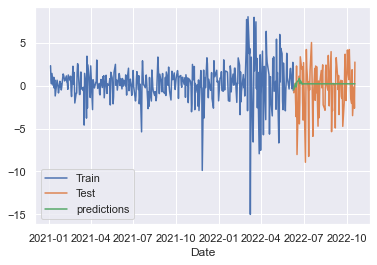

moving average performance of stock:  oil
     mae_ma    mse_ma   rmse_ma
0  2.305819  8.689988  2.947879


C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

moving average prediction of  gold


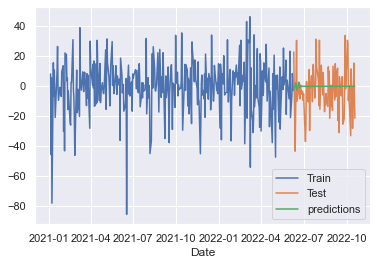

moving average performance of stock:  gold
     mae_ma      mse_ma    rmse_ma
0  12.22216  249.131998  15.783916


C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

moving average prediction of  russia_usa_exchange_rate


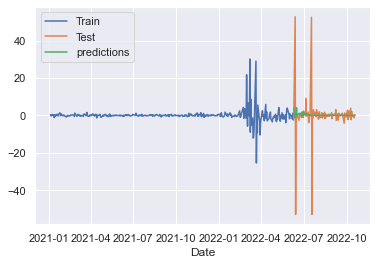

moving average performance of stock:  russia_usa_exchange_rate
     mae_ma      mse_ma    rmse_ma
0  3.672659  127.972096  11.312475


In [23]:
for column in assets_price_close_diff:
    train_len = int(len(assets_price_close_diff[column]) * 0.8)
    diff_train = assets_price_close_diff[column][:train_len]
    diff_test = assets_price_close_diff[column][train_len:]
    
    start = len(diff_train)
    end = len(diff_train) + len(diff_test) - 1
    if(column == 'oil'):
        ma_model = ARIMA(diff_train, order=(0, 0, 12))
        ma_result = ma_model.fit()
    elif(column == 'gold'):
        ma_model = ARIMA(diff_train, order=(0, 0, 11))
        ma_result = ma_model.fit()
    elif(column == 'russia_usa_exchange_rate'):
        ma_model = ARIMA(diff_train, order=(0, 0, 22))
        ma_result = ma_model.fit()
   
    
    ma_pred = ma_result.predict(start, end)
    ma_pred.index = diff_test.index
    plt.plot(diff_train.index, diff_train, label='Train')
    plt.plot(diff_test.index, diff_test, label='Test')
    plt.plot(ma_pred.index , ma_pred, label='predictions')
    print('moving average prediction of ',column)
    
    plt.legend()
    plt.xlabel('Date')
    plt.show()
    mae_ma = mean_absolute_error(diff_test, ma_pred)
    mse_ma = mean_squared_error(diff_test, ma_pred)
    rmse_ma = np.sqrt(mean_squared_error(diff_test, ma_pred))
    ma_perf = {'mae_ma': mae_ma,
             'mse_ma':mse_ma,
             'rmse_ma':rmse_ma}
    ma_perf = pd.DataFrame([ma_perf])
    print('moving average performance of stock: ', column)
    print(ma_perf)

### Autoregressive model

Autoregressive model (AR) is one of the most basic models in time series. As its name suggest, we regress the current value of a series over its lagged values. So, it is based on the idea that current values of series 𝑥𝑡 can be accounted for as a function of past values. the autoregressive model uses historical observations as input to a regression equations to predict the value at the next step

while modeling the autoregression model we will use the optimum lag value obtained from partial auto correlation function

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

Auto Regression prediction of  oil


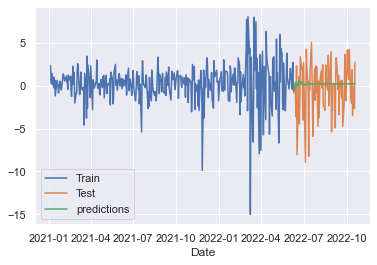

Auto Regression performance of:  oil
     mae_ar    mse_ar   rmse_ar
0  2.298329  8.569101  2.927303


C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

Auto Regression prediction of  gold


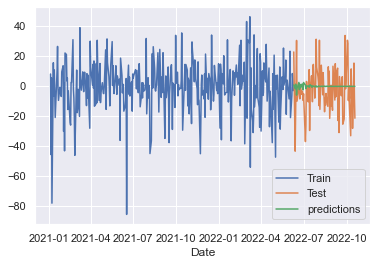

Auto Regression performance of:  gold
      mae_ar      mse_ar   rmse_ar
0  12.293934  249.560706  15.79749


C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

Auto Regression prediction of  russia_usa_exchange_rate


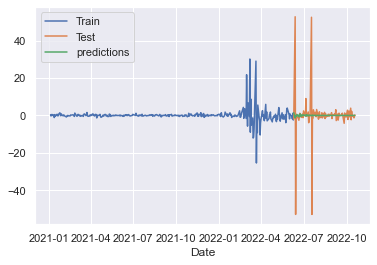

Auto Regression performance of:  russia_usa_exchange_rate
     mae_ar      mse_ar   rmse_ar
0  3.570713  126.613802  11.25228


In [24]:
for column in assets_price_close_diff:
    train_len = int(len(assets_price_close_diff[column]) * 0.8)
    diff_train = assets_price_close_diff[column][:train_len]
    diff_test = assets_price_close_diff[column][train_len:]
    
    start = len(diff_train)
    end = len(diff_train) + len(diff_test) - 1
    if(column == 'oil'):
        ar_model = ARIMA(diff_train, order=(12, 0, 0))
        ar_result = ar_model.fit()
    elif(column == 'gold'):
        ar_model = ARIMA(diff_train, order=(19, 0, 0))
        ar_result = ar_model.fit()
    elif(column == 'russia_usa_exchange_rate'):
        ar_model = ARIMA(diff_train, order=(12, 0, 0))
        ar_result = ar_model.fit()
    
    
    ar_pred = ar_result.predict(start, end)
    ar_pred.index = diff_test.index
    plt.plot(diff_train.index, diff_train, label='Train')
    plt.plot(diff_test.index, diff_test, label='Test')
    plt.plot(ar_pred.index , ar_pred, label='predictions')
    print('Auto Regression prediction of ',column)
    
    plt.legend()
    plt.xlabel('Date')
    plt.show()
    mae_ar = mean_absolute_error(diff_test, ar_pred)
    mse_ar = mean_squared_error(diff_test, ar_pred)
    rmse_ar = np.sqrt(mean_squared_error(diff_test, ar_pred))
    ar_perf = {'mae_ar': mae_ar,
             'mse_ar':mse_ar,
             'rmse_ar':rmse_ar}
    ar_perf = pd.DataFrame([ar_perf])
    print('Auto Regression performance of: ', column)
    print(ar_perf)

### ARIMA

integrating both auto regression and moving average

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

ARIMA  prediction of oil


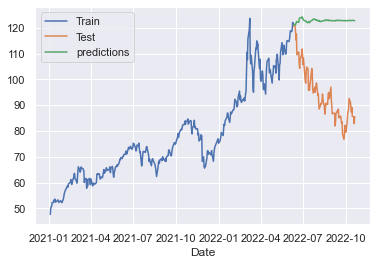

ARIMA prediction of oil
   mae_arima   mse_arima  rmse_arima
0  28.762559  930.977214   30.511919


C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

ARIMA  prediction of gold


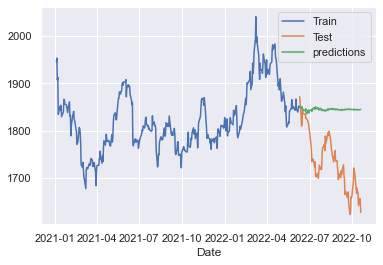

ARIMA prediction of gold
    mae_arima     mse_arima  rmse_arima
0  111.169898  15636.361245  125.045437


C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

ARIMA  prediction of russia_usa_exchange_rate


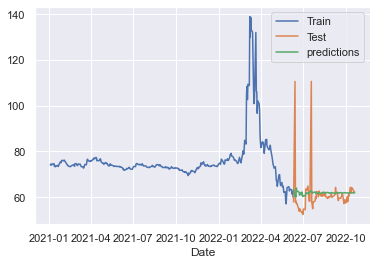

ARIMA prediction of russia_usa_exchange_rate
   mae_arima  mse_arima  rmse_arima
0   3.736769  65.167967    8.072668


In [26]:
for column in assets_price_close:
    train_len = int(len(assets_price_close[column]) * 0.8)
    diff_train = assets_price_close[column][:train_len]
    diff_test = assets_price_close[column][train_len:]
    
    start = len(diff_train)
    end = len(diff_train) + len(diff_test) - 1
    if(column == 'oil'):
        arima_model = ARIMA(diff_train, order=(12, 1, 12))
        arima_result = arima_model.fit()
    elif(column == 'gold'):
        arima_model = ARIMA(diff_train, order=(19, 1, 11))
        arima_result = arima_model.fit()
    elif(column == 'russia_usa_exchange_rate'):
        arima_model = ARIMA(diff_train, order=(12, 1, 22))
        arima_result = arima_model.fit()
    
    
    
    arima_pred = arima_result.predict(start, end)
    arima_pred.index = diff_test.index
    plt.plot(diff_train.index, diff_train, label='Train')
    plt.plot(diff_test.index, diff_test, label='Test')
    plt.plot(arima_pred.index , arima_pred, label='predictions')
    print('ARIMA  prediction of',column)
    
    plt.legend()
    plt.xlabel('Date')
    plt.show()
    mae_arima = mean_absolute_error(diff_test, arima_pred)
    mse_arima = mean_squared_error(diff_test, arima_pred)
    rmse_arima = np.sqrt(mean_squared_error(diff_test, arima_pred))
    arima_perf = {'mae_arima': mae_arima,
             'mse_arima':mse_arima,
             'rmse_arima':rmse_arima}
    arima_perf = pd.DataFrame([arima_perf])
    print('ARIMA prediction of', column)
    print(arima_perf)

## Forecasting

#### Using Moving Average

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

MA Forecasts of oil


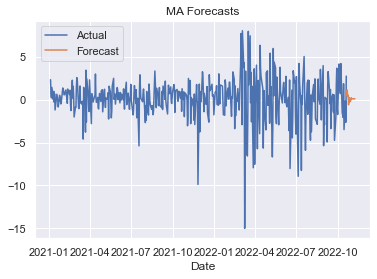

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

MA Forecasts of gold


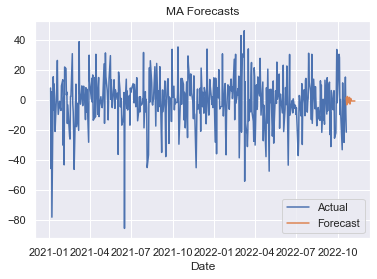

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

MA Forecasts of russia_usa_exchange_rate


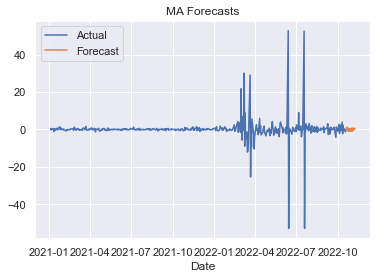

In [27]:
for column in assets_price_close_diff:
    if(column == 'oil'):
        ma_model = ARIMA(assets_price_close_diff[column], order=(0, 0, 12))
        ma_result = ma_model.fit()
    elif(column == 'gold'):
        ma_model = ARIMA(assets_price_close_diff[column], order=(0, 0, 11))
        ma_result = ma_model.fit()
    elif(column == 'russia_usa_exchange_rate'):
        ma_model = ARIMA(assets_price_close_diff[column], order=(0, 0, 22))
        ma_result = ma_model.fit()
    
    forecast_index = pd.date_range(diff_test.index[-1], periods=20)
    ma_forecast = ma_result.forecast(steps=20)
    ma_forecast.index = forecast_index
    plt.plot(assets_price_close_diff[column].index, assets_price_close_diff[column], label='Actual')
    plt.plot(ma_forecast.index, ma_forecast, label='Forecast')
    plt.legend()
    print('MA Forecasts of',column)
    plt.title('MA Forecasts')
    plt.xlabel('Date')
    plt.show()

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

MA Forecasts of oil
2022-10-19    85.756629
2022-10-20    84.931824
2022-10-21    86.245677
2022-10-22    85.902159
2022-10-23    86.693315
2022-10-24    85.492512
2022-10-25    85.228701
2022-10-26    84.676731
2022-10-27    83.284641
2022-10-28    82.929782
2022-10-29    81.879971
2022-10-30    81.845686
2022-10-31    81.153141
2022-11-01    81.153141
2022-11-02    81.153141
2022-11-03    81.153141
2022-11-04    81.153141
2022-11-05    81.153141
2022-11-06    81.153141
2022-11-07    81.153141
Freq: D, Name: predicted_mean, dtype: float64


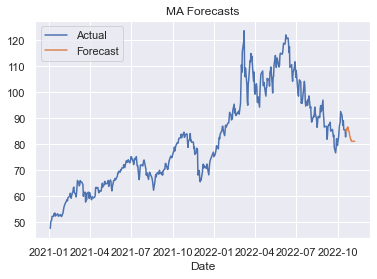

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

MA Forecasts of gold
2022-10-19    1628.648263
2022-10-20    1662.195436
2022-10-21    1665.582364
2022-10-22    1714.097278
2022-10-23    1729.411058
2022-10-24    1731.249875
2022-10-25    1754.585761
2022-10-26    1758.854499
2022-10-27    1789.006692
2022-10-28    1774.602629
2022-10-29    1808.754955
2022-10-30    1804.956703
2022-10-31    1804.956703
2022-11-01    1804.956703
2022-11-02    1804.956703
2022-11-03    1804.956703
2022-11-04    1804.956703
2022-11-05    1804.956703
2022-11-06    1804.956703
2022-11-07    1804.956703
Freq: D, Name: predicted_mean, dtype: float64


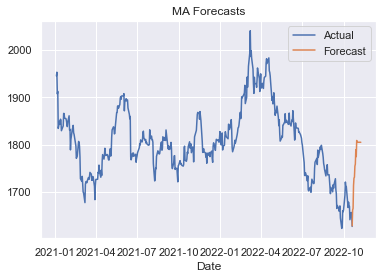

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

MA Forecasts of russia_usa_exchange_rate
2022-10-19    63.316206
2022-10-20    62.998140
2022-10-21    64.502346
2022-10-22    65.235542
2022-10-23    66.833833
2022-10-24    66.720113
2022-10-25    67.429233
2022-10-26    68.118970
2022-10-27    68.819648
2022-10-28    68.944172
2022-10-29    69.828214
2022-10-30    69.693262
2022-10-31    70.325776
2022-11-01    70.252860
2022-11-02    70.618002
2022-11-03    72.563125
2022-11-04    73.405061
2022-11-05    73.779403
2022-11-06    74.062569
2022-11-07    74.380913
Freq: D, Name: predicted_mean, dtype: float64


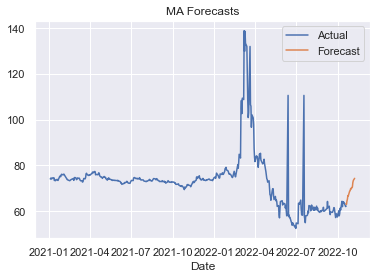

In [28]:
for column in assets_price_close:
    if(column == 'oil'):
        ma_model = ARIMA(assets_price_close[column], order=(0, 0, 12))
        ma_result = ma_model.fit()
    elif(column == 'gold'):
        ma_model = ARIMA(assets_price_close[column], order=(0, 0, 11))
        ma_result = ma_model.fit()
    elif(column == 'russia_usa_exchange_rate'):
        ma_model = ARIMA(assets_price_close[column], order=(0, 0, 22))
        ma_result = ma_model.fit()
    
    forecast_index = pd.date_range(diff_test.index[-1], periods=20)
    ma_forecast = ma_result.forecast(steps=20)
    ma_forecast.index = forecast_index
    plt.plot(assets_price_close[column].index, assets_price_close[column], label='Actual')
    plt.plot(ma_forecast.index, ma_forecast, label='Forecast')
    plt.legend()
    print('MA Forecasts of',column)
    plt.title('MA Forecasts')
    plt.xlabel('Date')
    print(ma_forecast)
    plt.show()

#### Using Auto regression

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

AR Forecasts of oil


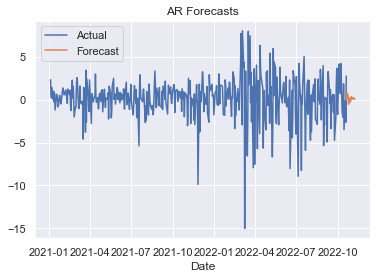

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

AR Forecasts of gold


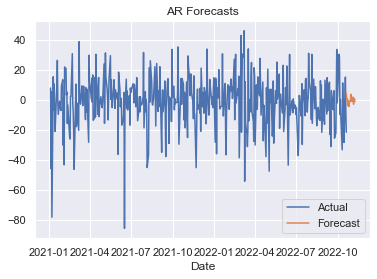

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

AR Forecasts of russia_usa_exchange_rate


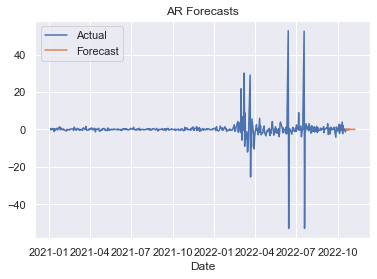

In [29]:
for column in assets_price_close_diff:
    if(column == 'oil'):
        ar_model = ARIMA(assets_price_close_diff[column], order=(12, 0, 0))
        ar_result = ar_model.fit()
    elif(column == 'gold'):
        ar_model = ARIMA(assets_price_close_diff[column], order=(19, 0, 0))
        ar_result = ar_model.fit()
    elif(column == 'russia_usa_exchange_rate'):
        ar_model = ARIMA(assets_price_close_diff[column], order=(12, 0, 0))
        ar_result = ar_model.fit()
    
    forecast_index = pd.date_range(diff_test.index[-1], periods=20)
    ar_forecast = ar_result.forecast(steps=20)
    ar_forecast.index = forecast_index
    plt.plot(assets_price_close_diff[column].index, assets_price_close_diff[column], label='Actual')
    plt.plot(ar_forecast.index, ar_forecast, label='Forecast')
    plt.legend()
    print('AR Forecasts of',column)
    plt.title('AR Forecasts')
    plt.xlabel('Date')
    plt.show()

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

AR Forecasts of oil
2022-10-19    85.789603
2022-10-20    85.589272
2022-10-21    86.154322
2022-10-22    86.488045
2022-10-23    86.804021
2022-10-24    86.193320
2022-10-25    86.396335
2022-10-26    86.191726
2022-10-27    86.155352
2022-10-28    85.772537
2022-10-29    85.741643
2022-10-30    85.770090
2022-10-31    85.671249
2022-11-01    85.648527
2022-11-02    85.622115
2022-11-03    85.683333
2022-11-04    85.614244
2022-11-05    85.590316
2022-11-06    85.552611
2022-11-07    85.529375
Freq: D, Name: predicted_mean, dtype: float64


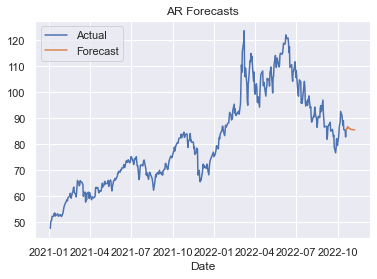

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

AR Forecasts of gold
2022-10-19    1634.453204
2022-10-20    1637.897492
2022-10-21    1643.492347
2022-10-22    1647.127505
2022-10-23    1646.928964
2022-10-24    1651.336848
2022-10-25    1653.538686
2022-10-26    1657.362423
2022-10-27    1658.487177
2022-10-28    1660.542904
2022-10-29    1667.172848
2022-10-30    1668.062090
2022-10-31    1671.616613
2022-11-01    1673.054855
2022-11-02    1677.427974
2022-11-03    1681.303776
2022-11-04    1683.182891
2022-11-05    1687.130885
2022-11-06    1689.892870
2022-11-07    1693.134907
Freq: D, Name: predicted_mean, dtype: float64


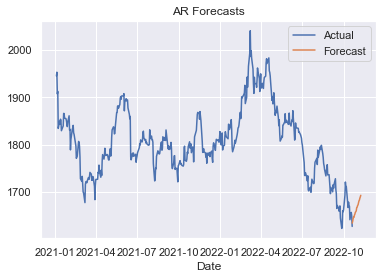

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

AR Forecasts of russia_usa_exchange_rate
2022-10-19    63.572948
2022-10-20    64.137046
2022-10-21    64.198712
2022-10-22    64.493087
2022-10-23    64.714088
2022-10-24    65.171575
2022-10-25    65.470635
2022-10-26    65.855071
2022-10-27    66.244769
2022-10-28    66.672427
2022-10-29    67.043086
2022-10-30    67.354685
2022-10-31    67.667325
2022-11-01    67.980428
2022-11-02    68.305468
2022-11-03    68.601987
2022-11-04    68.885798
2022-11-05    69.150557
2022-11-06    69.405295
2022-11-07    69.644000
Freq: D, Name: predicted_mean, dtype: float64


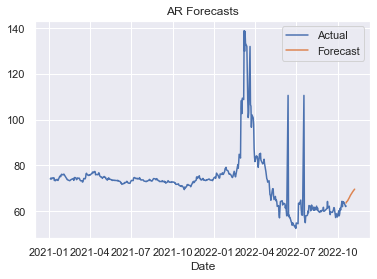

In [30]:
for column in assets_price_close:
    if(column == 'oil'):
        ar_model = ARIMA(assets_price_close[column], order=(12, 0, 0))
        ar_result = ar_model.fit()
    elif(column == 'gold'):
        ar_model = ARIMA(assets_price_close[column], order=(19, 0, 0))
        ar_result = ar_model.fit()
    elif(column == 'russia_usa_exchange_rate'):
        ar_model = ARIMA(assets_price_close[column], order=(12, 0, 0))
        ar_result = ar_model.fit()
    
    forecast_index = pd.date_range(diff_test.index[-1], periods=20)
    ar_forecast = ar_result.forecast(steps=20)
    ar_forecast.index = forecast_index
    plt.plot(assets_price_close[column].index, assets_price_close[column], label='Actual')
    plt.plot(ar_forecast.index, ar_forecast, label='Forecast')
    plt.legend()
    print('AR Forecasts of',column)
    plt.title('AR Forecasts')
    plt.xlabel('Date')
    print(ar_forecast)
    plt.show()

#### Using ARIMA

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

ARIMA Forecasts of oil


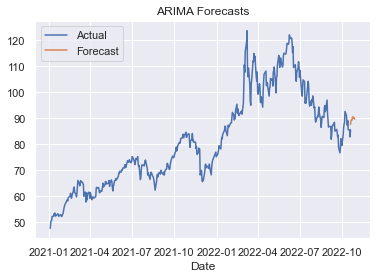

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

ARIMA Forecasts of gold


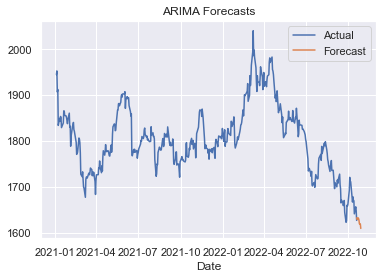

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

ARIMA Forecasts of russia_usa_exchange_rate


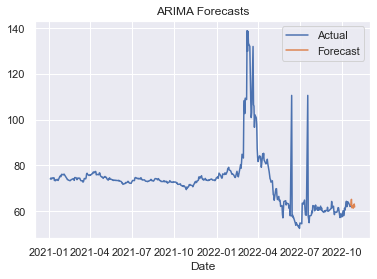

In [33]:
train_len = int(len(assets_price_close[column]) * 0.8)
diff_train = assets_price_close[column][:train_len]
diff_test = assets_price_close[column][train_len:]
for column in assets_price_close:
    
    if(column == 'oil'):
        arima_model = ARIMA(assets_price_close[column], order=(12, 1, 12))
        arima_result = arima_model.fit()
    elif(column == 'gold'):
        arima_model = ARIMA(assets_price_close[column], order=(19, 1, 11))
        arima_result = arima_model.fit()
    elif(column == 'russia_usa_exchange_rate'):
        arima_model = ARIMA(assets_price_close[column], order=(12, 1, 22))
        arima_result = arima_model.fit()
    
    forecast_index = pd.date_range(diff_test.index[-1], periods=10)
    arima_forecast = arima_result.forecast(steps=10)
    arima_forecast.index = forecast_index
    plt.plot(assets_price_close[column].index, assets_price_close[column], label='Actual')
    plt.plot(arima_forecast.index, arima_forecast, label='Forecast')
    plt.legend()
    print('ARIMA Forecasts of',column)
    plt.title('ARIMA Forecasts')
    plt.xlabel('Date')
    plt.show()

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

ARIMA Forecasts of oil
2022-10-19    87.657336
2022-10-20    89.131202
2022-10-21    89.289542
2022-10-22    89.235233
2022-10-23    90.299408
2022-10-24    90.620976
2022-10-25    90.362479
2022-10-26    89.962309
2022-10-27    90.122270
2022-10-28    89.697670
2022-10-29    88.329319
2022-10-30    86.902675
2022-10-31    87.022918
2022-11-01    87.573266
2022-11-02    87.856381
2022-11-03    87.708401
2022-11-04    88.456050
2022-11-05    89.147056
2022-11-06    88.981388
2022-11-07    88.364873
Freq: D, Name: predicted_mean, dtype: float64


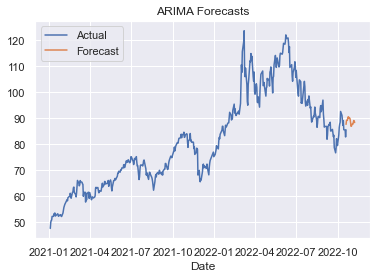

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

ARIMA Forecasts of gold
2022-10-19    1633.031354
2022-10-20    1629.559818
2022-10-21    1629.377355
2022-10-22    1633.132767
2022-10-23    1631.862353
2022-10-24    1628.390402
2022-10-25    1620.098911
2022-10-26    1619.281384
2022-10-27    1619.870933
2022-10-28    1610.001849
2022-10-29    1614.865882
2022-10-30    1613.442432
2022-10-31    1610.476785
2022-11-01    1609.176122
2022-11-02    1616.325537
2022-11-03    1622.236256
2022-11-04    1620.153594
2022-11-05    1622.602483
2022-11-06    1629.568197
2022-11-07    1631.977488
Freq: D, Name: predicted_mean, dtype: float64


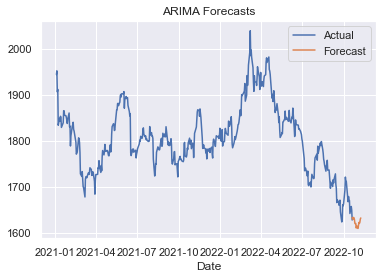

C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nette\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

ARIMA Forecasts of russia_usa_exchange_rate
2022-10-19    62.637601
2022-10-20    63.145925
2022-10-21    65.190738
2022-10-22    61.495423
2022-10-23    62.250724
2022-10-24    61.825507
2022-10-25    61.331957
2022-10-26    62.257601
2022-10-27    63.155860
2022-10-28    61.859392
2022-10-29    61.073039
2022-10-30    60.585810
2022-10-31    61.472106
2022-11-01    61.774959
2022-11-02    60.380711
2022-11-03    63.454326
2022-11-04    61.368973
2022-11-05    60.623875
2022-11-06    61.338751
2022-11-07    61.715933
Freq: D, Name: predicted_mean, dtype: float64


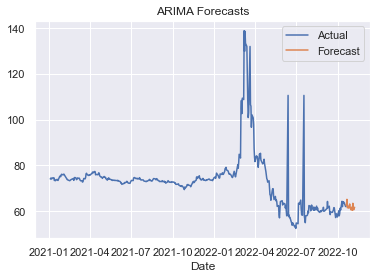

In [34]:
for column in assets_price_close:
    if(column == 'oil'):
        arima_model = ARIMA(assets_price_close[column], order=(12, 1, 12))
        arima_result = arima_model.fit()
    elif(column == 'gold'):
        arima_model = ARIMA(assets_price_close[column], order=(19, 1, 11))
        arima_result = arima_model.fit()
    elif(column == 'russia_usa_exchange_rate'):
        arima_model = ARIMA(assets_price_close[column], order=(12, 1, 22))
        arima_result = arima_model.fit()
    
    forecast_index = pd.date_range(diff_test.index[-1], periods=20)
    arima_forecast = arima_result.forecast(steps=20)
    arima_forecast.index = forecast_index
    plt.plot(assets_price_close[column].index, assets_price_close[column], label='Actual')
    plt.plot(arima_forecast.index, arima_forecast, label='Forecast')
    plt.legend()
    print('ARIMA Forecasts of',column)
    plt.title('ARIMA Forecasts')
    plt.xlabel('Date')
    print(arima_forecast)
    plt.show()

### Downloading the original data

In [35]:
new_data = ['RUB=X', 'CL=F', 'GC=F']
start = datetime.datetime(2022,10,19)
end = datetime.datetime(2022,11,4)
new_data_price = yf.download(new_data,start=start,end = end,interval='1d')

[*********************100%***********************]  3 of 3 completed


In [36]:
new_data_price_close=new_data_price["Close"]
new_data_price_close

,CL=F,GC=F,RUB=X
Date,,,
2022-10-19,85.550003,1627.500000,62.264999
2022-10-20,85.980003,1630.800049,60.965000
2022-10-21,85.050003,1651.000000,61.615002
2022-10-24,84.580002,1648.699951,61.615002
2022-10-25,85.320000,1652.800049,61.215000
2022-10-26,87.910004,1664.000000,62.215000
2022-10-27,89.080002,1660.699951,61.240002
2022-10-28,87.900002,1639.599976,61.290001
2022-10-31,86.529999,1635.900024,61.490002


## Conclusion:

After analysing the oil,gold and exchange rate of Russia and USA in 1 year period,it is observed that the there are quite variations in the assets prices.For predicting the future values we used time series models like ARIMA.By comparing the Root mean square error of all the models, it is observed that autoregression model is the best model out of 3 for prediction.Finally forecasted the next 20 days data using all the models.By analysing the forecasted data with the original data,it is obserevd that forecasted values are nearly equal to the original values.